In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import skimage

## Converting .bin to image

In [3]:
files = list(Path('.').glob("map*.bin"))

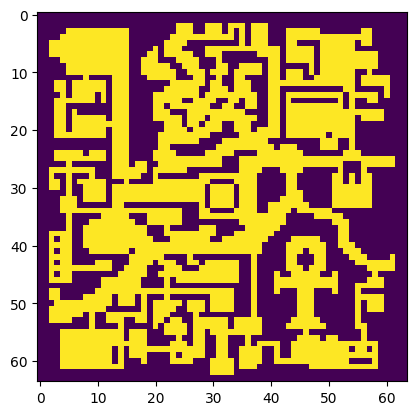

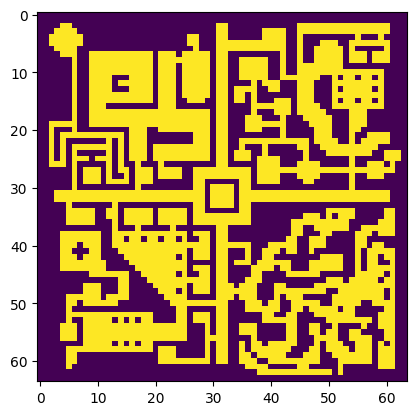

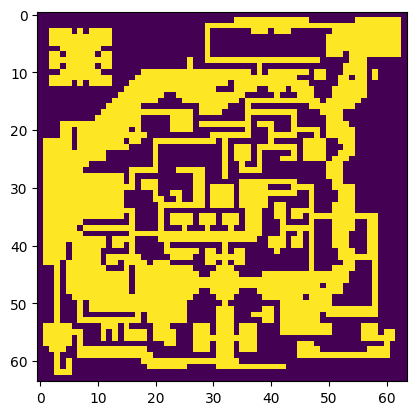

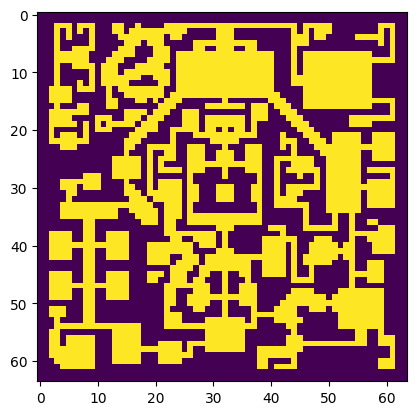

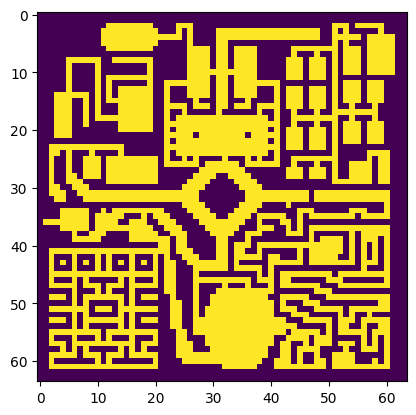

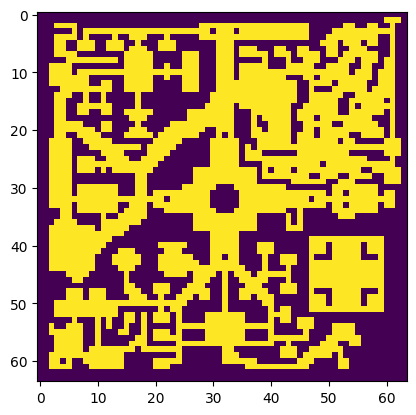

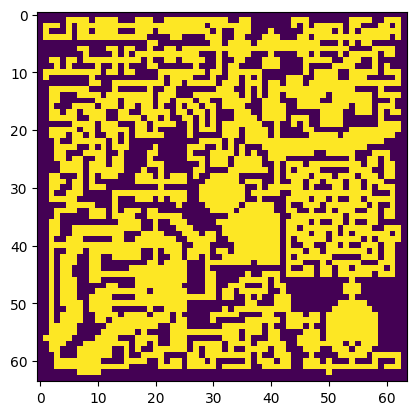

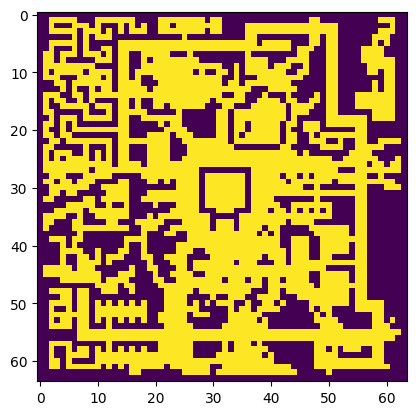

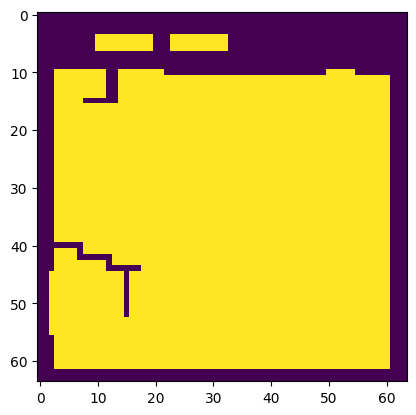

In [4]:
for file in files:
    raw = file.read_bytes()
    a = np.array(list(raw)).astype('uint8')
    plt.figure()
    arr = np.flipud(a.reshape(64, 64))
    plt.imshow(arr)
    skimage.io.imsave(file.with_suffix(".png"), arr*255)

## Converting .bmp edited in Gimp to labels

In [5]:
lut = []
with Path('./glasbey.lut').open('rb') as fp:
    for _ in range(256):
        r = int.from_bytes(fp.read(1))
        g = int.from_bytes(fp.read(1))
        b = int.from_bytes(fp.read(1))
        lut.append((r,g,b))

In [6]:
lut

[(255, 0, 255),
 (0, 0, 255),
 (0, 255, 0),
 (154, 0, 120),
 (31, 255, 177),
 (241, 254, 221),
 (32, 114, 118),
 (2, 200, 136),
 (255, 133, 161),
 (20, 0, 220),
 (147, 0, 0),
 (57, 238, 0),
 (171, 161, 164),
 (255, 71, 212),
 (251, 171, 117),
 (166, 0, 165),
 (98, 0, 0),
 (86, 159, 66),
 (255, 0, 252),
 (159, 167, 74),
 (0, 145, 207),
 (195, 253, 66),
 (106, 181, 132),
 (96, 255, 102),
 (254, 228, 17),
 (210, 91, 32),
 (180, 226, 0),
 (93, 166, 97),
 (98, 126, 0),
 (255, 7, 180),
 (148, 204, 55),
 (0, 150, 39),
 (206, 150, 180),
 (110, 147, 199),
 (115, 15, 172),
 (182, 216, 87),
 (216, 0, 243),
 (216, 1, 52),
 (255, 87, 198),
 (255, 123, 120),
 (162, 105, 198),
 (121, 0, 231),
 (217, 255, 209),
 (36, 87, 211),
 (203, 62, 0),
 (112, 209, 0),
 (105, 255, 233),
 (191, 69, 171),
 (14, 0, 118),
 (255, 94, 238),
 (159, 80, 189),
 (0, 88, 71),
 (1, 99, 2),
 (139, 171, 141),
 (85, 150, 0),
 (255, 222, 107),
 (30, 173, 255),
 (0, 138, 111),
 (225, 255, 229),
 (114, 111, 134),
 (99, 105, 200),


In [10]:
mapped = skimage.io.imread("map0.bmp")

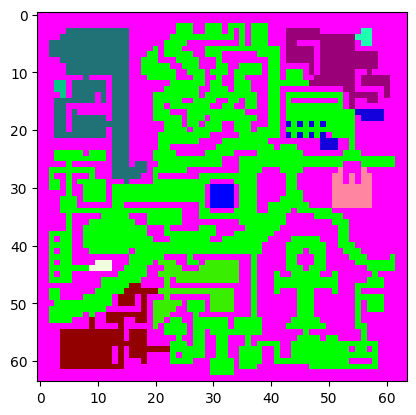

In [11]:
plt.imshow(mapped)

In [12]:
indexed = []
for pxl in mapped.reshape(-1, 1, 3):
    indexed.append(lut.index(tuple(pxl.flatten().tolist())))

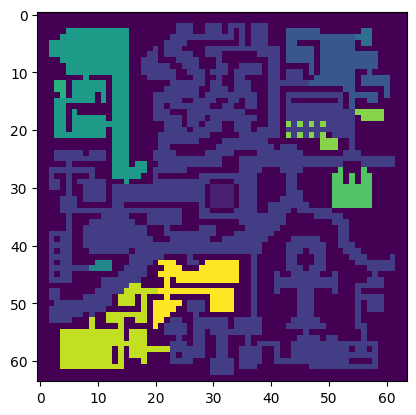

In [13]:
plt.imshow(np.array(indexed).reshape(64, 64))